# Introduction

#### The objective of this data analysis project is to delve into a comprehensive exploration of a Housing dataset, uncover hidden  patterns, and extract valuable insights. By employing various analytical techniques, we aim to transform raw data into actionable information that can drive strategic decision-making, optimize processes, and facilitate better understanding of the Housing dataset.,to find solution to the problems.

In [1]:
# importing the required libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [36]:
# loading the Housing dataset
df=pd.read_excel('housing.xlsx')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


## Dataset Overview

* Housing dataset is an excel file
* It has 10 columns and 20640 rows
* Some columns have float values and other have integer values and onlu colum ocean_proximity is object.
* Below is shown the information of this dataset using .info() method

In [18]:
df.shape

(20640, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Q.no.1 What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

In [14]:
# The average value of median_income from the dataset using .mean() method
df['median_income'].head()
avg=df['median_income'].mean()
print(round(avg,4))

3.8707


#### Here the average value of median_income is 3.8707

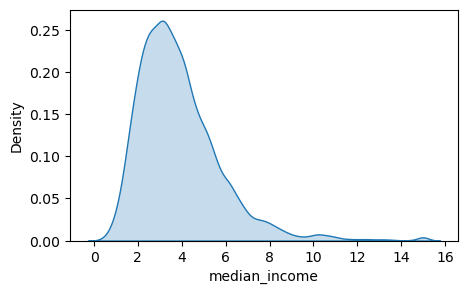

In [27]:
plt.figure(figsize=(5,3))
ax=sns.kdeplot(x='median_income',data=df,fill=True,palette='magma')
plt.show()

* I have used Kernel Density plot to plot the 'median_income' and see its distribution
* The 'median_income' of the people lies in range between 0 to 16.
* We can say from the Kernel Density plot , that large number of people have the 'median_income' between 0 to 5.
* The number of people having 'median_income' more than 6 is less.
* The number of people having 'median_income' in range between 10 to 16 is very less.
* The number of people having 'median_income'=4 is maximum.

## Question no 2
###  Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

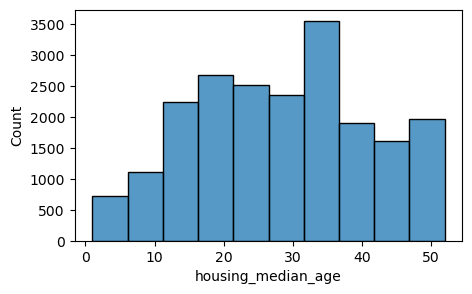

In [29]:
# We will use a histogram plot to see the distribution of housing_median_age

plt.figure(figsize=(5,3))
sns.histplot(x='housing_median_age',data=df,bins=10)

* We can conclude from the above histogram plot that,'housing_median_age' is very diverse.
* In that , the people have 'housing_median_age'between 0 to 11 are low compared to others.
* The people having 'housing_median_age' in range of 30 to 40 is the highest.
* Majority of the people are in the age group between 15 to 40

## Question no 3
###  Show with the help of visualization, how median_income and median_house_values are related?

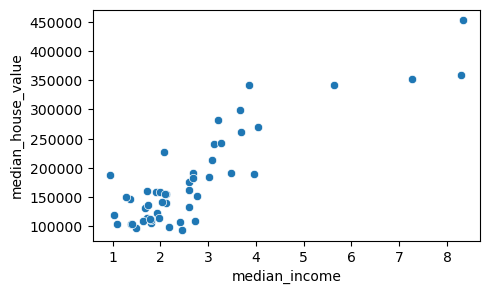

In [38]:
plt.figure(figsize=(5,3))
df1=df.head(50)
sns.scatterplot(x='median_income',y='median_house_value',data=df1,palette='husl')
plt.show()

* I have used top 50 records of the dataset to analyze 'median_income' and 'median_house_value'
* I have used Scatterplot ,where on x axis I kept 'median_income' and on y axis I kept 'median_house_value'.
* From this we can see a pattern ,as the median_income increases the 'median_house_value' also increases gradually
* It is not in linear way completely but similar to it. 

## Question no 4
###  Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [45]:
# to do this we will first check for the null values.
df[df['total_bedrooms'].isnull()]
# now to delete it we will use dropna() method to delete the records where total_bedrooms are not avalable
data_set1=df.dropna()
# we have dropped the na values and created a data_set1 where all non null records are there.
# to see we will again check for the null values in the newly created dataset
data_set1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

* We have created a new dataset named 'data_set1' whoch doesnot have any null values.
* We have used the .dropna() method to delete the unwanted data.
* We have also used the .isnull() method for again checking the null values.

## Question no 5
### Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [55]:
df.isnull().sum()
# to fill the total_bedrooms null value with the mean['total_bedrooms']
# calculating the mean from newly created dataset which has no null values
mean_value=data_set1['total_bedrooms'].mean()
# to fill null values with mean value
data_set2 = df.fillna(df['total_bedrooms'].mean())
data_set2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

* We have created a dataset named data_set2,where the null values of the 'total_bedrooms' is filled with the mean of it.

## Question no 6
### Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [59]:
def median_value(x):
    return x.median()
median_value(df['total_rooms'])

2127.0

* I have created a function median_value(x), it takes x amd return median value of it.

## Question no 7
### Plot latitude versus longitude and explain your observations.

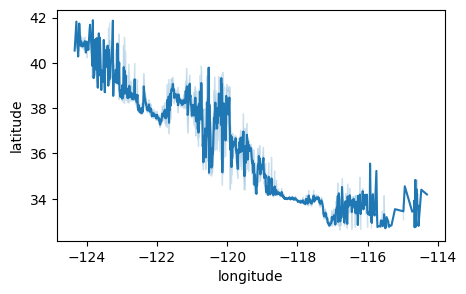

In [62]:
plt.figure(figsize=(5,3))
sns.lineplot(x='longitude',y='latitude',data=df)
plt.show()

* From the graph, we can see that , as the longitude increases vales of lattitude decreases.
* It shows a linear varitation with a negative slope.,means values of lattitude decreases as the value of longitude tends towards positive side.

## Question no 8
### Create a data set for which the ocean_proximity is ‘Near ocean’.

In [68]:
data_set3=df[df['ocean_proximity']=='NEAR OCEAN']
data_set3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2658 entries, 1850 to 20425
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2658 non-null   float64
 1   latitude            2658 non-null   float64
 2   housing_median_age  2658 non-null   int64  
 3   total_rooms         2658 non-null   int64  
 4   total_bedrooms      2628 non-null   float64
 5   population          2658 non-null   int64  
 6   households          2658 non-null   int64  
 7   median_income       2658 non-null   float64
 8   median_house_value  2658 non-null   int64  
 9   ocean_proximity     2658 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 228.4+ KB


* Here we have created a dataset named data_set3, which has the ocean_proximity ='NEAR OCEAN'
* We have used .info() method to display the no. of records it has.
* It has in total 2658 records.

## Quesion no 9
### Find the mean and median of the median income for the data set created in question 8.

In [75]:
# displaying top 5 records of the newly created dataset data_set3
data_set3.head()
# getting info ot that dataset 
data_set3.info()
# calculating mean of data_set3['median_income']
mean=data_set3['median_income'].mean()

# calculating median of data_set3['median_income']
median = data_set3['median_income'].median()

print('The mean of the newly created dataset i.e data_set3 is :',mean)
print('The median of the newly created dataset i.e data_set3 is :',median)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2658 entries, 1850 to 20425
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2658 non-null   float64
 1   latitude            2658 non-null   float64
 2   housing_median_age  2658 non-null   int64  
 3   total_rooms         2658 non-null   int64  
 4   total_bedrooms      2628 non-null   float64
 5   population          2658 non-null   int64  
 6   households          2658 non-null   int64  
 7   median_income       2658 non-null   float64
 8   median_house_value  2658 non-null   int64  
 9   ocean_proximity     2658 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 228.4+ KB
The mean of the newly created dataset i.e data_set3 is : 4.005784800601957
The median of the newly created dataset i.e data_set3 is : 3.64705


## Question no 10 
### Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [81]:
# we will use np.where() method to create the column total_bedroom_size with the required classes as small,medium,large.

# Create a new column 'total_bedroom_size' based on 'total_bedrooms' values
df['total_bedroom_size'] = np.where(df['total_bedrooms'] <= 10, 'small',
                                      np.where((df['total_bedrooms'] >= 11) & (df['total_bedrooms'] < 1000), 'medium', 'large'))
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,medium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,large
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,medium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,medium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,medium
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,medium
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY,medium
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY,medium
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY,medium
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY,medium


* We have added the new column using the numpy method .where()
* np.where() will take the condition and gives the output specified in parameter if only condition is satisfied or else, it gives the output as the specified false value . 